<a href="https://colab.research.google.com/github/Lizett23/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd

# URL del archivo JSON (raw)
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Cargar datos directamente desde la API (GitHub Raw)
df = pd.read_json(url)

# Mostrar las primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [7]:
df_final = df.copy()

In [13]:
# Desempaquetar columnas anidadas
df_customer = df['customer'].apply(pd.Series)
df_phone = df['phone'].apply(pd.Series)
df_internet = df['internet'].apply(pd.Series)
df_account = df['account'].apply(pd.Series)

# La columna 'Charges' dentro de 'account' también es un diccionario
df_charges = df_account['Charges'].apply(pd.Series)


In [14]:
# Concatenar todo en un nuevo dataframe limpio
df_final = pd.concat([
    df[['customerID', 'Churn']],     # columnas principales
    df_customer,                     # género, pareja, etc.
    df_phone,                        # servicios de teléfono
    df_internet,                     # servicios de internet
    df_account.drop(columns='Charges'),  # resto de cuenta
    df_charges                      # mensual y total
], axis=1)


In [15]:
df_final.head()
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [16]:
for col in df_final.columns:
    print(f"\nValores únicos en '{col}':")
    print(df_final[col].unique())



Valores únicos en 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Churn':
['No' 'Yes' '']

Valores únicos en 'gender':
['Female' 'Male']

Valores únicos en 'SeniorCitizen':
[0 1]

Valores únicos en 'Partner':
['Yes' 'No']

Valores únicos en 'Dependents':
['Yes' 'No']

Valores únicos en 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en 'PhoneService':
['Yes' 'No']

Valores únicos en 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos en 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos en 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos en 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores únicos en 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores ú

In [17]:
#Valores nulos
df_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [18]:
#Valores duplicados
df_final.duplicated().sum()


np.int64(0)

In [19]:
for col in df_final.select_dtypes(include='object').columns:
    print(f"\nColumna: {col}")
    print(df_final[col].value_counts(dropna=False))



Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Columna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Columna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Columna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Columna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Columna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Columna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Columna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Columna: OnlineSecurity
OnlineSecurity
No                     3608
Yes      

In [21]:
for col in df_final.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df_final[col].unique())



customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn:
['No' 'Yes' '']

gender:
['Female' 'Male']

Partner:
['Yes' 'No']

Dependents:
['Yes' 'No']

PhoneService:
['Yes' 'No']

MultipleLines:
['No' 'Yes' 'No phone service']

InternetService:
['DSL' 'Fiber optic' 'No']

OnlineSecurity:
['No' 'Yes' 'No internet service']

OnlineBackup:
['Yes' 'No' 'No internet service']

DeviceProtection:
['No' 'Yes' 'No internet service']

TechSupport:
['Yes' 'No' 'No internet service']

StreamingTV:
['Yes' 'No' 'No internet service']

StreamingMovies:
['No' 'Yes' 'No internet service']

Contract:
['One year' 'Month-to-month' 'Two year']

PaperlessBilling:
['Yes' 'No']

PaymentMethod:
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Total:
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [23]:
#Eliminar espacios
for col in df_final.select_dtypes(include='object').columns:
    df_final[col] = df_final[col].str.strip()


In [25]:
df_final['Churn'] = df_final['Churn'].replace('', pd.NA)
df_final['Churn'] = df_final['Churn'].fillna('No')  # o lo que tenga más sentido para ti


In [26]:
print(df_final['Churn'].unique())


['No' 'Yes']


In [27]:
# Ver columnas con tipo 'object'
object_cols = df_final.select_dtypes(include='object').columns

# Revisar si esas columnas contienen solo números (aunque estén como texto)
for col in object_cols:
    try:
        df_final[col].astype(float)
        print(f"🔸 La columna '{col}' podría ser numérica pero está como 'object'")
    except:
        print(f"✅ La columna '{col}' es realmente categórica o contiene texto: '{col}'")


✅ La columna 'customerID' es realmente categórica o contiene texto: 'customerID'
✅ La columna 'Churn' es realmente categórica o contiene texto: 'Churn'
✅ La columna 'gender' es realmente categórica o contiene texto: 'gender'
✅ La columna 'Partner' es realmente categórica o contiene texto: 'Partner'
✅ La columna 'Dependents' es realmente categórica o contiene texto: 'Dependents'
✅ La columna 'PhoneService' es realmente categórica o contiene texto: 'PhoneService'
✅ La columna 'MultipleLines' es realmente categórica o contiene texto: 'MultipleLines'
✅ La columna 'InternetService' es realmente categórica o contiene texto: 'InternetService'
✅ La columna 'OnlineSecurity' es realmente categórica o contiene texto: 'OnlineSecurity'
✅ La columna 'OnlineBackup' es realmente categórica o contiene texto: 'OnlineBackup'
✅ La columna 'DeviceProtection' es realmente categórica o contiene texto: 'DeviceProtection'
✅ La columna 'TechSupport' es realmente categórica o contiene texto: 'TechSupport'
✅ La c

In [28]:
print("Tipo de dato:", df_final['Total'].dtype)
print("\nValores únicos problemáticos:")
print(df_final['Total'].unique())


Tipo de dato: object

Valores únicos problemáticos:
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [36]:
# Convertir la columna 'Total' a tipo float de forma segura
df_final['Total'] = pd.to_numeric(df_final['Total'], errors='coerce')


In [39]:
df_final['Total'] = df_final['Total'].fillna(0)


In [38]:
df_final['Total'].isna().sum()


np.int64(0)

In [42]:
df_final.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [44]:
for col in df_final.select_dtypes(include='object').columns:
    print(f"{col}: {df_final[col].unique()}")


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [46]:
# Quitar espacios en blanco y homogeneizar valores
for col in df_final.select_dtypes(include='object').columns:
    df_final[col] = df_final[col].str.strip()  # elimina espacios
    df_final[col] = df_final[col].replace('No internet service', 'No')  # normaliza sin internet
    df_final[col] = df_final[col].replace('No phone service', 'No')     # normaliza sin teléfono


In [47]:
for col in df_final.select_dtypes(include='object').columns:
    print(f"{col}: {df_final[col].unique()}")


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['Yes' 'No']
StreamingTV: ['Yes' 'No']
StreamingMovies: ['No' 'Yes']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [45]:
#Para detectar valores numéricos fuera de rango lógico//Mira si hay valores negativos donde no deberían, o montos absurdamente altos.
df_final.describe()

,SeniorCitizen,tenure,Monthly,Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035
std,0.369074,24.571773,30.129572,2268.648587
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.425000,396.200000
50%,0.000000,29.000000,70.300000,1389.200000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000


In [48]:
df_final['Cuentas_Diarias'] = (df_final['Monthly'] / 30).round(2)


In [49]:
df_final[['Monthly', 'Cuentas_Diarias']].head()


,Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [51]:
# Lista de columnas con valores Yes/No
cols_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# Reemplazo
df_final[cols_binarias] = df_final[cols_binarias].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)


In [122]:
df_final.rename(columns={
    'customerID': 'ID_Cliente',
    'gender':'Genero',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'PhoneService': 'Servicio_Telefono',
    'SeniorCitizen': 'Anciano',
    'MultipleLines': 'Multiples_Lineas',
    'OnlineSecurity': 'Seguridad_En_Linea',
    'OnlineBackup': 'Respaldo_En_Linea',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'TV_Streaming',
    'StreamingMovies': 'Peliculas_Streaming',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Factura_Sin_Papel',
    'PaymentMethod': 'Metodo_Pago',
    'tenure': 'Meses_Contrato',
    'Monthly': 'Cargo_Mensual',
    'Total': 'Total_Facturado',
    'Cuentas_Diarias': 'Gasto_Diario'
}, inplace=True)



In [126]:
df_final.rename(columns={
    'Múltiples_Líneas': 'Multiples_Lineas',
    'Seguridad_En_Línea': 'Seguridad_En_Linea',
    'Respaldo_En_Línea': 'Respaldo_En_Linea',
    'Protección_Dispositivo': 'Proteccion_Dispositivo',
    'Soporte_Técnico': 'Soporte_Tecnico',
    'Películas_Streaming': 'Peliculas_Streaming'
}, inplace=True)


In [127]:
df_final.columns

Index(['ID_Cliente', 'Churn', 'Genero', 'Anciano', 'Pareja', 'Dependientes',
       'Meses_Contrato', 'Servicio_Telefono', 'Multiples_Lineas',
       'InternetService', 'Seguridad_En_Linea', 'Respaldo_En_Linea',
       'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming',
       'Peliculas_Streaming', 'Tipo_Contrato', 'Factura_Sin_Papel',
       'Método_Pago', 'Cargo_Mensual', 'Total_Facturado', 'Gasto_Diario',
       'Churn_Label'],
      dtype='object')

In [128]:
cols_binarias = ['Genero', 'ID_Cliente', 'Pareja', 'Dependientes', 'Servicio_Telefono', 'Anciano', 'Multiples_Lineas',
                 'Seguridad_En_Linea', 'Respaldo_En_Linea', 'Proteccion_Dispositivo',
                 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Factura_Sin_Papel']

In [129]:
df_final[cols_binarias].head()

,Genero,ID_Cliente,Pareja,Dependientes,Servicio_Telefono,Anciano,Multiples_Lineas,Seguridad_En_Linea,Respaldo_En_Linea,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Factura_Sin_Papel
0,Female,0002-ORFBO,1,1,1,0,0,0,1,0,1,1,0,1
1,Male,0003-MKNFE,0,0,1,0,1,0,0,0,0,0,1,0
2,Male,0004-TLHLJ,0,0,1,0,0,0,0,1,0,0,0,1
3,Male,0011-IGKFF,1,0,1,1,0,0,1,1,0,1,1,1
4,Female,0013-EXCHZ,1,0,1,1,0,0,0,0,1,1,0,1


#📊 Carga y análisis

In [81]:
# Análisis descriptivo de variables numéricas
df_final.describe().round(2)


,Churn,Anciano,Pareja,Dependientes,Meses_Contrato,Servicio_Telefono,Múltiples_Líneas,Seguridad_En_Línea,Respaldo_En_Línea,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Factura_Sin_Papel,Cargo_Mensual,Total_Facturado,Gasto_Diario
count,7267.00,7267.00,7267.00,7267.00,7267.00,7267.0,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00
mean,0.26,0.16,0.48,0.30,32.35,0.9,0.42,0.29,0.34,0.34,0.29,0.38,0.39,0.59,64.72,2277.18,2.16
std,0.44,0.37,0.50,0.46,24.57,0.3,0.49,0.45,0.48,0.47,0.45,0.49,0.49,0.49,30.13,2268.65,1.00
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,0.00,0.61
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.42,396.20,1.18
50%,0.00,0.00,0.00,0.00,29.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,70.30,1389.20,2.34
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,89.88,3778.52,3.00
max,1.00,1.00,1.00,1.00,72.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,118.75,8684.80,3.96


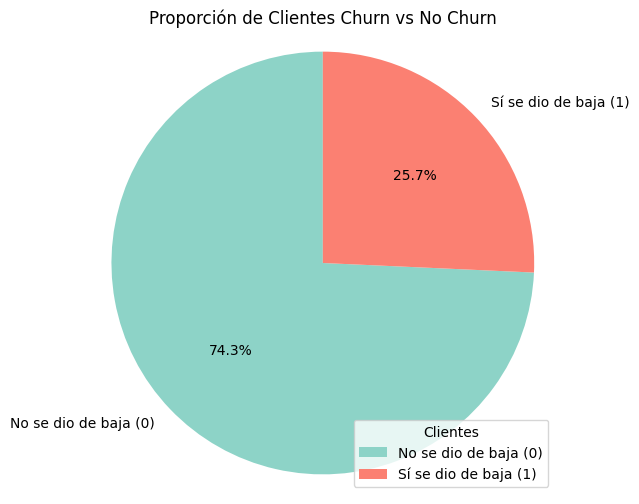

In [83]:
# Conteo de valores de churn
churn_counts = df_final['Churn'].value_counts()

# Etiquetas personalizadas
labels = ['No se dio de baja (0)', 'Sí se dio de baja (1)']

# Gráfico circular con leyenda
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#8dd3c7', '#fb8072'])
plt.title('Proporción de Clientes Churn vs No Churn')
plt.axis('equal')  # Hace que el gráfico sea un círculo
plt.legend(title="Clientes", loc="lower right")
plt.show()


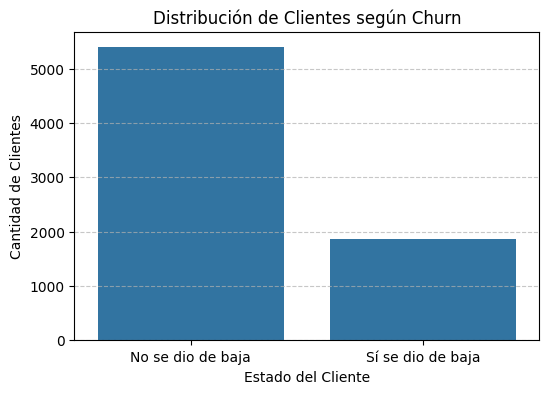

In [93]:
# Conteo de clientes que se quedaron o se fueron
df_final['Churn_Label'] = df_final['Churn'].map({0: 'No se dio de baja', 1: 'Sí se dio de baja'})

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(data=df_final, x='Churn_Label')
plt.title('Distribución de Clientes según Churn')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



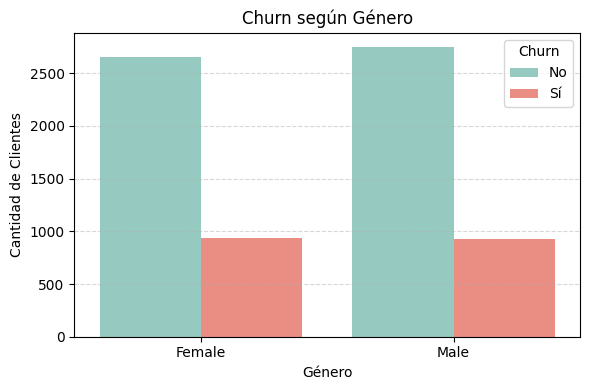

In [130]:
#Recuento de evasión por variables categóricas
#Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.
#genero
plt.figure(figsize=(6, 4))
sns.countplot(data=df_final, x='Genero', hue='Churn', palette=['#8dd3c7', '#fb8072'])
plt.title('Churn según Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


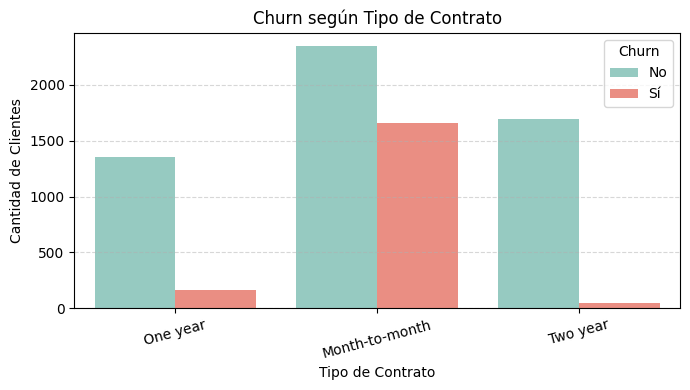

In [96]:
#Tipo de contrato
plt.figure(figsize=(7, 4))
sns.countplot(data=df_final, x='Tipo_Contrato', hue='Churn', palette=['#8dd3c7', '#fb8072'])
plt.title('Churn según Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


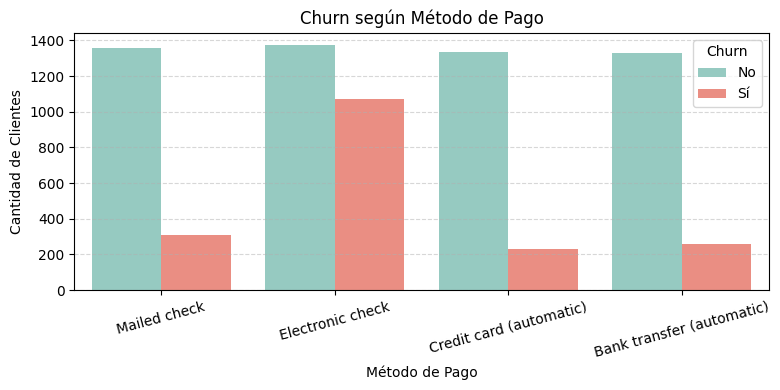

In [132]:
#metodo de pago
plt.figure(figsize=(8, 4))
sns.countplot(data=df_final, x='Método_Pago', hue='Churn', palette=['#8dd3c7', '#fb8072'])
plt.title('Churn según Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#📄Informe final